In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


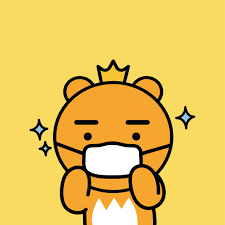

In [ ]:
#드라이브 연동 테스트
from IPython.display import Image
Image('/gdrive/My Drive/test.png')

In [139]:
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import pandas as pd

#데이터 생성
data_root= ('/gdrive/My Drive/AIFinal/pokemons')

IMAGE_SHAPE = (224,224)
TRAINING_DATA_DIR = str(data_root)
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset='validation',
shuffle=True,
target_size=IMAGE_SHAPE
)





train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset='training',
shuffle=True,
target_size=IMAGE_SHAPE)

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])

setList = []
bugSet = set(); setList.append(bugSet)
darkSet = set(); setList.append(darkSet)
dragonSet = set(); setList.append(dragonSet)
eletronicSet = set(); setList.append(eletronicSet)
fairySet = set(); setList.append(fairySet)
fightingSet = set(); setList.append(fightingSet)
fireSet = set(); setList.append(fireSet)
flyingSet = set(); setList.append(flyingSet)
ghostSet = set(); setList.append(ghostSet)
grassSet = set(); setList.append(grassSet)
groundSet = set(); setList.append(groundSet)
iceSet = set(); setList.append(iceSet)
normalSet = set(); setList.append(normalSet)
poisonSet = set(); setList.append(poisonSet)
psychicSet = set(); setList.append(psychicSet)
rockSet = set(); setList.append(rockSet)
steelSet = set(); setList.append(steelSet)
waterSet = set(); setList.append(waterSet)

for i in range (0,train_generator.samples):
    tmpStr= train_generator.filenames[i][len(dataset_labels[train_generator.labels[i]][0])+1:]
    saveStr = ''
    for c in tmpStr:
        if c == ' ' or c == '.':
            break
        else :
            saveStr += c
    setList[dataset_labels[train_generator.labels[i]][1]].add(saveStr)

for i in range (0,valid_generator.samples):
    tmpStr= valid_generator.filenames[i][len(dataset_labels[valid_generator.labels[i]][0])+1:]
    saveStr = ''
    for c in tmpStr:
        if c == ' ' or c == '.':
            break
        else :
            saveStr += c
    setList[dataset_labels[valid_generator.labels[i]][1]].add(saveStr)

print(setList[0])
## 동시에 2개의 클래스를 가지는 포켓몬들 존재 -> 각클래스에 속하는 포켓몬들 이름 지정
## 153개의 유효성 검사 656개의 훈련용 데이터 생성
## 829개 유효성 3350개 훈련용으로 업데이트

Found 684 images belonging to 18 classes.
Found 2771 images belonging to 18 classes.
{'Ninjask', 'Nincada', 'Venipede', 'Dwebble', 'Sewaddle', 'Weedle', 'Paras', 'Venonat', 'bug', 'Shedinja', 'Anorith'}


In [ ]:
#데이터 시각화
for image_batch, label_batch in train_generator:
    break

#text에 label종류 쓰기
labels ='\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt','w') as f:
    f.write(labels)
!cat labels.txt

bug
dark
dragon
electric
fairy
fighting
fire
flying
ghost
grass
ground
ice
normal
poison
psychic
rock
steel
water

In [ ]:
#분류 모델 만들기
model = tf.keras.Sequential([
 hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')])

model.build([None, 224, 224, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 18)                23058     
Total params: 2,281,042
Trainable params: 23,058
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#훈련(10세대)
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(
 optimizer=optimizer,
 loss='categorical_crossentropy',
 metrics=['acc'])

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator, 
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history


Epoch 1/10
87/87 [==============================] - 1242s 14s/step - loss: 3.2978 - acc: 0.0942 - val_loss: 2.8941 - val_acc: 0.1345
Epoch 2/10
87/87 [==============================] - 118s 1s/step - loss: 2.3352 - acc: 0.2809 - val_loss: 2.8495 - val_acc: 0.1930
Epoch 3/10
87/87 [==============================] - 118s 1s/step - loss: 2.0715 - acc: 0.3416 - val_loss: 2.9254 - val_acc: 0.1915
Epoch 4/10
87/87 [==============================] - 118s 1s/step - loss: 1.8128 - acc: 0.4009 - val_loss: 2.9224 - val_acc: 0.2003
Epoch 5/10
87/87 [==============================] - 118s 1s/step - loss: 1.6576 - acc: 0.4489 - val_loss: 2.9992 - val_acc: 0.1944
Epoch 6/10
87/87 [==============================] - 117s 1s/step - loss: 1.5420 - acc: 0.4767 - val_loss: 2.9905 - val_acc: 0.1988
Epoch 7/10
87/87 [==============================] - 117s 1s/step - loss: 1.4855 - acc: 0.4946 - val_loss: 3.0469 - val_acc: 0.2032
Epoch 8/10
87/87 [==============================] - 116s 1s/step - loss: 1.3951 -

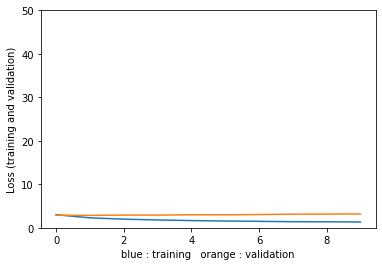

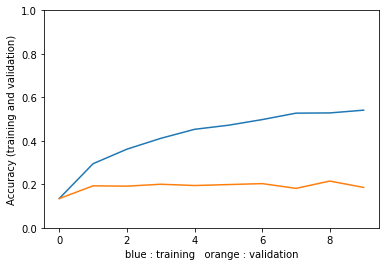

In [ ]:
#그래프 그리기
plt.figure()
plt.ylabel('Loss (training and validation)')
plt.xlabel('blue : training   orange : validation')
plt.ylim([0,50])
plt.plot(hist['loss'])

plt.plot(hist['val_loss'])
plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('blue : training   orange : validation')
plt.ylim([0,1])
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])

In [140]:
#성능확인

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

batch = valid_generator
current_index = ((valid_generator.batch_index-1) * valid_generator.batch_size)
if current_index < 0:
    if valid_generator.samples % valid_generator.batch_size > 0:
        current_index = max(0,valid_generator.samples - valid_generator.samples % valid_generator.batch_size)
    else:
        current_index = max(0,valid_generator.samples - valid_generator.batch_size)
index_array = valid_generator.index_array[current_index:current_index + valid_generator.batch_size].tolist()
img_paths = []
for i in index_array:
    tmpStr= valid_generator.filenames[i][len(dataset_labels[valid_generator.labels[i]][0])+1:]
    saveStr = ''
    for c in tmpStr:
        if c == ' ' or c == '.':
            break
        else :
            saveStr += c
    img_paths.append(saveStr)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Validation batch shape: (32, 224, 224, 3)
['Cottonee', 'Dragon', 'Anorith', 'Fairy', 'Archen', 'Dreepy', 'Fighting', 'Carvanha', 'Combusken', 'Normal', 'Electric', 'AlolanSandshrew', 'Anorith', 'Cottonee', 'Drifloon', 'Bellsprout', 'Articuno', 'Croagunk', 'Beldum', 'Azurill', 'Fire', 'Bulbasaur', 'Dark', 'Electric', 'BlackKyurem', 'Bellsprout', 'Electric', 'Geodude', 'Beldum', 'Azurill', 'Archen', 'Electric']
['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']


32
Prediction results shape: (32, 18)
['Fairy' 'Flying' 'Poison' 'Normal' 'Fire' 'Flying' 'Water' 'Dragon'
 'Fire' 'Normal' 'Electric' 'Rock' 'Psychic' 'Flying' 'Grass' 'Grass'
 'Flying' 'Electric' 'Steel' 'Fairy' 'Electric' 'Grass' 'Dragon' 'Flying'
 'Rock' 'Water' 'Electric' 'Rock' 'Steel' 'Fairy' 'Fire' 'Fire']


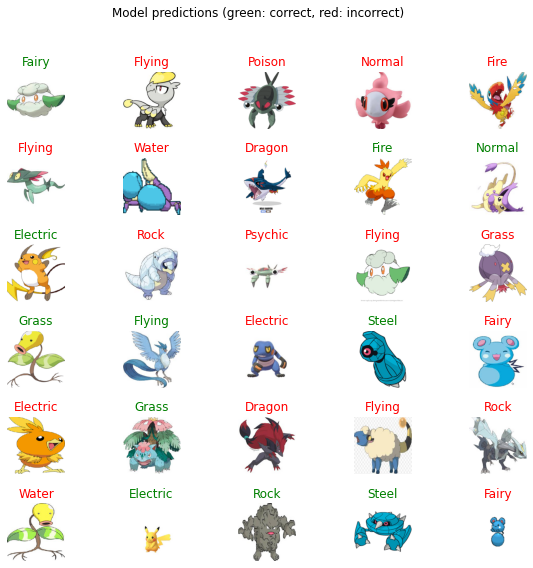

In [141]:

tf_model_predictions = model.predict(val_image_batch)
print(len(tf_model_predictions))
print('Prediction results shape:', tf_model_predictions.shape)

predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
    plt.subplot(6,5,n+1)
    plt.imshow(val_image_batch[n])
    if predicted_ids[n] == true_label_ids[n]:
        color = 'green'
    else :
        if img_paths[n] in setList[predicted_ids[n]]:
            color = 'green'
        else:
            color = 'red'
        
    plt.title(predicted_labels[n].title(), color=color)
    plt.axis('off')
    _ = plt.suptitle('Model predictions (green: correct, red: incorrect)')


In [ ]:
#새로운 모델

img = tf.keras.preprocessing.image.load_img(
    '/gdrive/My Drive/test.png', target_size=IMAGE_SHAPE)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array/255, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "If your picture is a Pokemon, type of {} with a {:.2f} percent chance."
    .format(dataset_labels[np.argmax(score)][0], 100 * np.max(score))
)

If your picture is a Pokemon, type of flying with a 6.24 percent chance.
